# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [417]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [418]:
#!pip install plotly

wxpython 4.0.3 requires PyPubSub, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [419]:
#!pip install gensim

wxpython 4.0.3 requires PyPubSub, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [420]:
#!pip install tqdm

wxpython 4.0.3 requires PyPubSub, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 1.1 Reading Data

In [421]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [422]:
project_data.shape

(109248, 17)

In [423]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [424]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [425]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


###Adding resource data in dataframe

In [426]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [427]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [428]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8


In [429]:
project_data = project_data.sample(n=50000)
#project_data=project_data.tail(1000)
project_data.shape

(50000, 19)

In [430]:
project_data["project_grade_category"][0:5]

30307    Grades PreK-2
63595       Grades 6-8
40370    Grades PreK-2
22065       Grades 6-8
82879       Grades 6-8
Name: project_grade_category, dtype: object

In [435]:
'''project_grade_category = []
for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)'''

'project_grade_category = []\nfor i in range(len(project_data)):\n    a = project_data["project_grade_category"][i].replace(" ", "_")\n    project_grade_category.append(a)'

In [ ]:
'''project_data.drop(['project_grade_category'], axis=1, inplace=True)'''

In [ ]:
'''project_data["project_grade_category"] = project_grade_category'''

In [ ]:
project_data["project_grade_category"][0:5]

In [261]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

## 1.2 preprocessing of `project_subject_categories`

In [262]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [263]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [264]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories'],
      dtype='object')

## 1.3 Text preprocessing

In [265]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [266]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
64523,91754,p129653,8e4f569f1b4bb74bca6d9dd539a30a69,Mrs.,CA,2016-11-04 20:14:11,Grades PreK-2,We Can with Common Core!,Our class is a moderate to severe K -2 Autism....,When guided practice activities and independen...,NaN,NaN,My students need Hands-on Math Centers and Rea...,1,0,473.99,5,AppliedLearning,EarlyDevelopment Other,Our class is a moderate to severe K -2 Autism....
35234,61823,p083413,32cecfe09b671bcf0f519dfc78c80858,Mrs.,DE,2016-08-24 11:55:59,Grades PreK-2,Sensational Sensory Play!,My classroom is a special education preschool ...,We will use these materials to explore sensory...,NaN,NaN,My students need items for our sand and water ...,1,1,249.74,4,Math_Science SpecialNeeds,Mathematics SpecialNeeds,My classroom is a special education preschool ...


In [267]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [268]:
'''# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)'''

'# printing some random reviews\nprint(project_data[\'essay\'].values[0])\nprint("="*50)\nprint(project_data[\'essay\'].values[150])\nprint("="*50)\nprint(project_data[\'essay\'].values[1000])\nprint("="*50)\nprint(project_data[\'essay\'].values[20000])\nprint("="*50)\nprint(project_data[\'essay\'].values[99999])\nprint("="*50)'

In [269]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [270]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

My students are amazingly creative and talented people. They are curious about their world and want to make it a better place. We have amazing discussion about the state of our communities and ways that they can get involved and help out.\r\nOur students come from a wide variety of homes and backgrounds, which contributes to a rich and exciting school environment. These backgrounds add to our culture, but also reflect our nation and the differences that exists. This reminds me to reach out and be part of the greater community.Sophomore is at our school will be following a path of personal exploration. We hope that this exploration will help the students ask questions about what kind of people they want to become, and how they can impact their world in a positive way. We hope to use The Alchemist as one book that gives students a look into what a personal journey can look like, what it is like to go in search of something only to discover that what you were looking for is not what you e

In [271]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are amazingly creative and talented people. They are curious about their world and want to make it a better place. We have amazing discussion about the state of our communities and ways that they can get involved and help out.  Our students come from a wide variety of homes and backgrounds, which contributes to a rich and exciting school environment. These backgrounds add to our culture, but also reflect our nation and the differences that exists. This reminds me to reach out and be part of the greater community.Sophomore is at our school will be following a path of personal exploration. We hope that this exploration will help the students ask questions about what kind of people they want to become, and how they can impact their world in a positive way. We hope to use The Alchemist as one book that gives students a look into what a personal journey can look like, what it is like to go in search of something only to discover that what you were looking for is not what you exp

In [272]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are amazingly creative and talented people They are curious about their world and want to make it a better place We have amazing discussion about the state of our communities and ways that they can get involved and help out Our students come from a wide variety of homes and backgrounds which contributes to a rich and exciting school environment These backgrounds add to our culture but also reflect our nation and the differences that exists This reminds me to reach out and be part of the greater community Sophomore is at our school will be following a path of personal exploration We hope that this exploration will help the students ask questions about what kind of people they want to become and how they can impact their world in a positive way We hope to use The Alchemist as one book that gives students a look into what a personal journey can look like what it is like to go in search of something only to discover that what you were looking for is not what you expected Life o

In [273]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [274]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:22<00:00, 2260.62it/s]


In [275]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

In [276]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,preprocessed_essays
64523,91754,p129653,8e4f569f1b4bb74bca6d9dd539a30a69,Mrs.,CA,2016-11-04 20:14:11,Grades PreK-2,We Can with Common Core!,Our class is a moderate to severe K -2 Autism....,When guided practice activities and independen...,NaN,NaN,My students need Hands-on Math Centers and Rea...,1,0,473.99,5,AppliedLearning,EarlyDevelopment Other,class moderate severe k 2 autism students exhi...
35234,61823,p083413,32cecfe09b671bcf0f519dfc78c80858,Mrs.,DE,2016-08-24 11:55:59,Grades PreK-2,Sensational Sensory Play!,My classroom is a special education preschool ...,We will use these materials to explore sensory...,NaN,NaN,My students need items for our sand and water ...,1,1,249.74,4,Math_Science SpecialNeeds,Mathematics SpecialNeeds,classroom special education preschool classroo...


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [277]:
# similarly you can preprocess the titles also

In [278]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 49734.63it/s]


In [279]:
# after preprocesing
preprocessed_project_title[1000]

'learning coding small robots inspires students'

In [280]:
#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

In [281]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_project_title
64523,91754,p129653,8e4f569f1b4bb74bca6d9dd539a30a69,Mrs.,CA,2016-11-04 20:14:11,Grades PreK-2,Our class is a moderate to severe K -2 Autism....,When guided practice activities and independen...,NaN,NaN,My students need Hands-on Math Centers and Rea...,1,0,473.99,5,AppliedLearning,EarlyDevelopment Other,class moderate severe k 2 autism students exhi...,we can common core
35234,61823,p083413,32cecfe09b671bcf0f519dfc78c80858,Mrs.,DE,2016-08-24 11:55:59,Grades PreK-2,My classroom is a special education preschool ...,We will use these materials to explore sensory...,NaN,NaN,My students need items for our sand and water ...,1,1,249.74,4,Math_Science SpecialNeeds,Mathematics SpecialNeeds,classroom special education preschool classroo...,sensational sensory play


In [282]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 64523 to 64958
Data columns (total 20 columns):
Unnamed: 0                                      50000 non-null int64
id                                              50000 non-null object
teacher_id                                      50000 non-null object
teacher_prefix                                  49998 non-null object
school_state                                    50000 non-null object
Date                                            50000 non-null datetime64[ns]
project_grade_category                          50000 non-null object
project_essay_1                                 50000 non-null object
project_essay_2                                 50000 non-null object
project_essay_3                                 1726 non-null object
project_essay_4                                 1726 non-null object
project_resource_summary                        50000 non-null object
teacher_number_of_previously_posted_projec

In [283]:
#df.drop(df.columns[[0,1,2,5,7,8,9,10,]], axis=1, inplace=True)

# Assignment 4: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Naive Bayes</h1>

#2.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [285]:
y=project_data['project_is_approved']
y.shape

(50000,)

In [286]:
#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')

In [287]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#split the data into train and test fo bag of words

x_t,x_test,y_t,y_test=model_selection.train_test_split(project_data,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
x_train,x_cv,y_train,y_cv=model_selection.train_test_split(x_t,y_t,test_size=0.3,random_state=0)

spliting train_data into train and cross validation in ratio of 7/3

In [288]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#2.2 Make Data Model Ready: encoding numerical, categorical features


### 2.2.1 encoding categorical features</font>





In [289]:
x_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_project_title
36042,52328,p258857,58c7a1a2439b6089b5a9520edb3eb21e,Mrs.,LA,2016-08-25 14:31:13,Grades 3-5,"In your career, do you need to know basic comp...",Chromebooks are a cost-effective tool to teach...,NaN,NaN,My students need four Chromebooks to prepare t...,3,1,149.99,4,Math_Science,AppliedSciences Mathematics,career need know basic computer skills hiring ...,geaux google 2
105042,136291,p060674,81ff1fef09d6e65b488168635ee77111,Mrs.,IL,2017-04-07 09:49:43,Grades 3-5,Thank you so much for considering donating to ...,The following was written completely by my thi...,NaN,NaN,My students need wireless mice for the classro...,3,0,8.89,25,AppliedLearning,Other,thank much considering donating third grade cl...,mice on our desks


In [290]:
#one hot encoding for clean_categories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(x_train['clean_categories'].values)
#vectorizer.fit(X_train['clean_subcategories'].values)

x_train_categories_one_hot = vectorizer1.transform(x_train['clean_categories'].values)
x_cv_categories_one_hot = vectorizer1.transform(x_cv['clean_categories'].values)
x_test_categories_one_hot = vectorizer1.transform(x_test['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_cv_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (24500, 9)
Shape of matrix after one hot encodig  (10500, 9)
Shape of matrix after one hot encodig  (15000, 9)


In [291]:
#one hot encoding for clean_subcategories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(x_train['clean_subcategories'].values)

x_train_subcategories_one_hot = vectorizer2.transform(x_train['clean_subcategories'].values)
x_cv_subcategories_one_hot = vectorizer2.transform(x_cv['clean_subcategories'].values)
x_test_subcategories_one_hot = vectorizer2.transform(x_test['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_subcategories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_cv_subcategories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_subcategories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'ESL', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (24500, 30)
Shape of matrix after one hot encodig  (10500, 30)
Shape of matrix after one hot encodig  (15000, 30)


In [292]:
#one hot encoding for school_state


my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))


#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(x_train['school_state'].values)

x_train_school_state_one_hot = vectorizer3.transform(x_train['school_state'].values)
x_cv_school_state_one_hot = vectorizer3.transform(x_cv['school_state'].values)
x_test_school_state_one_hot = vectorizer3.transform(x_test['school_state'].values)
print(vectorizer3.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_school_state_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_cv_school_state_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_school_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NE', 'SD', 'DE', 'NH', 'AK', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'LA', 'NJ', 'OK', 'OH', 'MA', 'WA', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (24500, 51)
Shape of matrix after one hot encodig  (10500, 51)
Shape of matrix after one hot encodig  (15000, 51)


In [293]:
#one hot encoding for project_grade_category

my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
    
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))




#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer4 = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer4.fit(x_train['project_grade_category'].values)

x_train_grade_category_one_hot = vectorizer4.transform(x_train['project_grade_category'].values)
x_cv_grade_category_one_hot = vectorizer4.transform(x_cv['project_grade_category'].values)
x_test_grade_category_one_hot = vectorizer4.transform(x_test['project_grade_category'].values)
print(vectorizer4.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_grade_category_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_cv_grade_category_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_grade_category_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (24500, 5)
Shape of matrix after one hot encodig  (10500, 5)
Shape of matrix after one hot encodig  (15000, 5)


In [294]:
#one hot encoding for project_prefix

my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
    
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))




#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer5 = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer5.fit(x_train['teacher_prefix'].values)

x_train_prefix_one_hot = vectorizer5.transform(x_train['teacher_prefix'].values)
x_cv_prefix_one_hot = vectorizer5.transform(x_cv['teacher_prefix'].values)
x_test_prefix_one_hot = vectorizer5.transform(x_test['teacher_prefix'].values)
print(vectorizer5.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_cv_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (24500, 5)
Shape of matrix after one hot encodig  (10500, 5)
Shape of matrix after one hot encodig  (15000, 5)


In [295]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.2.2 encoding numerical features</font>

In [296]:
x_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_project_title
36042,52328,p258857,58c7a1a2439b6089b5a9520edb3eb21e,Mrs.,LA,2016-08-25 14:31:13,Grades 3-5,"In your career, do you need to know basic comp...",Chromebooks are a cost-effective tool to teach...,NaN,NaN,My students need four Chromebooks to prepare t...,3,1,149.99,4,Math_Science,AppliedSciences Mathematics,career need know basic computer skills hiring ...,geaux google 2
105042,136291,p060674,81ff1fef09d6e65b488168635ee77111,Mrs.,IL,2017-04-07 09:49:43,Grades 3-5,Thank you so much for considering donating to ...,The following was written completely by my thi...,NaN,NaN,My students need wireless mice for the classro...,3,0,8.89,25,AppliedLearning,Other,thank much considering donating third grade cl...,mice on our desks


In [297]:
'''#price standardization of x_train data
#--------------------------------------
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_price_standardized = price_scalar.transform(x_train['price'].values.reshape(-1, 1))'''

'#price standardization of x_train data\n#--------------------------------------\n# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s\n# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\nfrom sklearn.preprocessing import StandardScaler\n\n# price_standardized = standardScalar.fit(project_data[\'price\'].values)\n# this will rise the error\n# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].\n# Reshape your data either using array.reshape(-1, 1)\n\nprice_scalar = StandardScaler()\nprice_scalar.fit(x_train[\'price\'].values.reshape(-1,1)) # finding the mean and standard deviation of this data\nprint(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")\n\n# Now standardize the data with above maen and variance.\nx_train_price_standardized = price_scalar.transform(x_train[\'price\'].values.reshape(-1, 1))'

In [298]:
'''x_train_price_standardized = (x_train['price']-min(x_train['price']))/(max(x_train['price'])-min(x_train['price']))
x_train_price_standardized=x_train_price_standardized.values.reshape(24500,1)
print(type(x_train_price_standardized))
print(x_train_price_standardized.shape)'''

"x_train_price_standardized = (x_train['price']-min(x_train['price']))/(max(x_train['price'])-min(x_train['price']))\nx_train_price_standardized=x_train_price_standardized.values.reshape(24500,1)\nprint(type(x_train_price_standardized))\nprint(x_train_price_standardized.shape)"

In [299]:
#Normalize thae dataset
#https://www.w3cschool.cn/doc_scikit_learn/scikit_learn-modules-generated-sklearn-preprocessing-normalize.html
#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
import sklearn
x_train_price_standardized=sklearn.preprocessing.normalize(x_train['price'].values.reshape(-1,1), norm='l2', axis=1, copy=True, return_norm=False)
x_train_price_standardized.shape

(24500, 1)

In [300]:
'''#price standardization of x_cv data
#--------------------------------------
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_cv_price_standardized = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))'''

'#price standardization of x_cv data\n#--------------------------------------\n# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s\n# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\nfrom sklearn.preprocessing import StandardScaler\n\n# price_standardized = standardScalar.fit(project_data[\'price\'].values)\n# this will rise the error\n# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].\n# Reshape your data either using array.reshape(-1, 1)\n\nprice_scalar = StandardScaler()\nprice_scalar.fit(x_cv[\'price\'].values.reshape(-1,1)) # finding the mean and standard deviation of this data\n#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")\n\n# Now standardize the data with above maen and variance.\nx_cv_price_standardized = price_scalar.transform(x_cv[\'price\'].values.reshape(-1, 1))'

In [301]:
'''x_cv_price_standardized = (x_cv['price']-min(x_cv['price']))/(max(x_cv['price'])-min(x_cv['price']))
x_cv_price_standardized=x_cv_price_standardized.values.reshape(10500,1)
print(type(x_cv_price_standardized))
print(x_cv_price_standardized.shape)'''

"x_cv_price_standardized = (x_cv['price']-min(x_cv['price']))/(max(x_cv['price'])-min(x_cv['price']))\nx_cv_price_standardized=x_cv_price_standardized.values.reshape(10500,1)\nprint(type(x_cv_price_standardized))\nprint(x_cv_price_standardized.shape)"

In [302]:
#Normalize thae dataset
#https://www.w3cschool.cn/doc_scikit_learn/scikit_learn-modules-generated-sklearn-preprocessing-normalize.html
#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
import sklearn
x_cv_price_standardized=sklearn.preprocessing.normalize(x_cv['price'].values.reshape(-1,1), norm='l2', axis=1, copy=True, return_norm=False)
x_cv_price_standardized.shape

(10500, 1)

In [303]:
'''#price standardization of x_test data
#--------------------------------------
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_test_price_standardized = price_scalar.transform(x_test['price'].values.reshape(-1, 1))'''

'#price standardization of x_test data\n#--------------------------------------\n# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s\n# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\nfrom sklearn.preprocessing import StandardScaler\n\n# price_standardized = standardScalar.fit(project_data[\'price\'].values)\n# this will rise the error\n# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].\n# Reshape your data either using array.reshape(-1, 1)\n\nprice_scalar = StandardScaler()\nprice_scalar.fit(x_test[\'price\'].values.reshape(-1,1)) # finding the mean and standard deviation of this data\n#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")\n\n# Now standardize the data with above maen and variance.\nx_test_price_standardized = price_scalar.transform(x_test[\'price\'].values.reshape(-1, 1))'

In [304]:
'''x_test_price_standardized = (x_test['price']-min(x_test['price']))/(max(x_test['price'])-min(x_test['price']))
x_test_price_standardized=x_test_price_standardized.values.reshape(15000,1)
print(type(x_test_price_standardized))
print(x_test_price_standardized.shape)'''

"x_test_price_standardized = (x_test['price']-min(x_test['price']))/(max(x_test['price'])-min(x_test['price']))\nx_test_price_standardized=x_test_price_standardized.values.reshape(15000,1)\nprint(type(x_test_price_standardized))\nprint(x_test_price_standardized.shape)"

In [305]:
'''x_test_price_standardized = (x_test['price']-min(x_test['price']))/(max(x_test['price'])-min(x_test['price']))
x_test_price_standardized.reshape(-1,1).shape
print(type(x_test_price_standardized))
print(x_test_price_standardized.shape)'''

"x_test_price_standardized = (x_test['price']-min(x_test['price']))/(max(x_test['price'])-min(x_test['price']))\nx_test_price_standardized.reshape(-1,1).shape\nprint(type(x_test_price_standardized))\nprint(x_test_price_standardized.shape)"

In [306]:
#Normalize thae dataset
#https://www.w3cschool.cn/doc_scikit_learn/scikit_learn-modules-generated-sklearn-preprocessing-normalize.html
#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
import sklearn
x_test_price_standardized=sklearn.preprocessing.normalize(x_test['price'].values.reshape(-1,1), norm='l2', axis=1, copy=True, return_norm=False)
x_test_price_standardized.shape

(15000, 1)

### 2.2.3 merge numerical and categorical data</font>

In [307]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = hstack((x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_school_state_one_hot, x_train_grade_category_one_hot, x_train_prefix_one_hot, x_train_price_standardized))
x_cv_ohe = hstack((x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_school_state_one_hot, x_cv_grade_category_one_hot, x_cv_prefix_one_hot, x_cv_price_standardized))
x_test_ohe = hstack((x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_school_state_one_hot, x_test_grade_category_one_hot, x_test_prefix_one_hot, x_test_price_standardized))

print(x_train_ohe.shape)
print(x_cv_ohe.shape)
print(x_test_ohe.shape)

(24500, 101)
(10500, 101)
(15000, 101)


In [308]:
print(x_train_categories_one_hot.shape)
print(x_train_subcategories_one_hot.shape)
print(x_train_school_state_one_hot.shape)
print(x_train_grade_category_one_hot.shape)
print(x_train_prefix_one_hot.shape)
print(x_train_price_standardized.shape)

(24500, 9)
(24500, 30)
(24500, 51)
(24500, 5)
(24500, 5)
(24500, 1)


#2.3 Make Data Model Ready: encoding eassay, and project_title

#2.4 Appling NB() on different kind of featurization as mentioned in the instructions
<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [309]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

### vectorize the essay and title data,<font color='red'> SET 1</font>

In [310]:
#you can vectorize the essay
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay = CountVectorizer(min_df=10)
vectorizer_essay.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_bow1=vectorizer_essay.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_essays = vectorizer_essay.transform(x_train['preprocessed_essays'].values)
x_cv_bow_essays = vectorizer_essay.transform(x_cv['preprocessed_essays'].values)
x_test_bow_essays = vectorizer_essay.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_essays.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_bow_essays.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_essays.shape)

Shape of matrix after one hot encodig  (24500, 9123) (24500,)
Shape of matrix after one hot encodig  (10500, 9123)
Shape of matrix after one hot encodig  (15000, 9123)


In [311]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#you can vectorize the title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_title = CountVectorizer(min_df=10)
vectorizer_title.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_bow2=vectorizer_title.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_title = vectorizer_title.transform(x_train['preprocessed_project_title'].values)
x_cv_bow_title = vectorizer_title.transform(x_cv['preprocessed_project_title'].values)
x_test_bow_title = vectorizer_title.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_title.shape)
print("Shape of matrix after one hot encodig ",x_cv_bow_title.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_title.shape)

Shape of matrix after one hot encodig  (24500, 1304)
Shape of matrix after one hot encodig  (10500, 1304)
Shape of matrix after one hot encodig  (15000, 1304)


In [312]:
# Please write all the code with proper documentation

### merge dataset,<font color='red'> SET 1</font>

In [313]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_ohe, x_train_bow_essays, x_train_bow_title)).tocsr()
x_cv_bow = hstack((x_cv_ohe, x_cv_bow_essays, x_cv_bow_title)).tocsr()
x_test_bow = hstack((x_test_ohe, x_test_bow_essays, x_test_bow_title)).tocsr()


print(x_train_bow.shape)
print(x_cv_bow.shape)
print(x_test_bow.shape)

(24500, 10528)
(10500, 10528)
(15000, 10528)


In [314]:
type(x_train_bow)

scipy.sparse.csr.csr_matrix

### simple tuning

In [315]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [316]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i)
    nb.fit(x_train_bow, y_train)

    y_train_pred = batch_predict(nb, x_train_bow)    
    y_cv_pred = batch_predict(nb, x_cv_bow)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


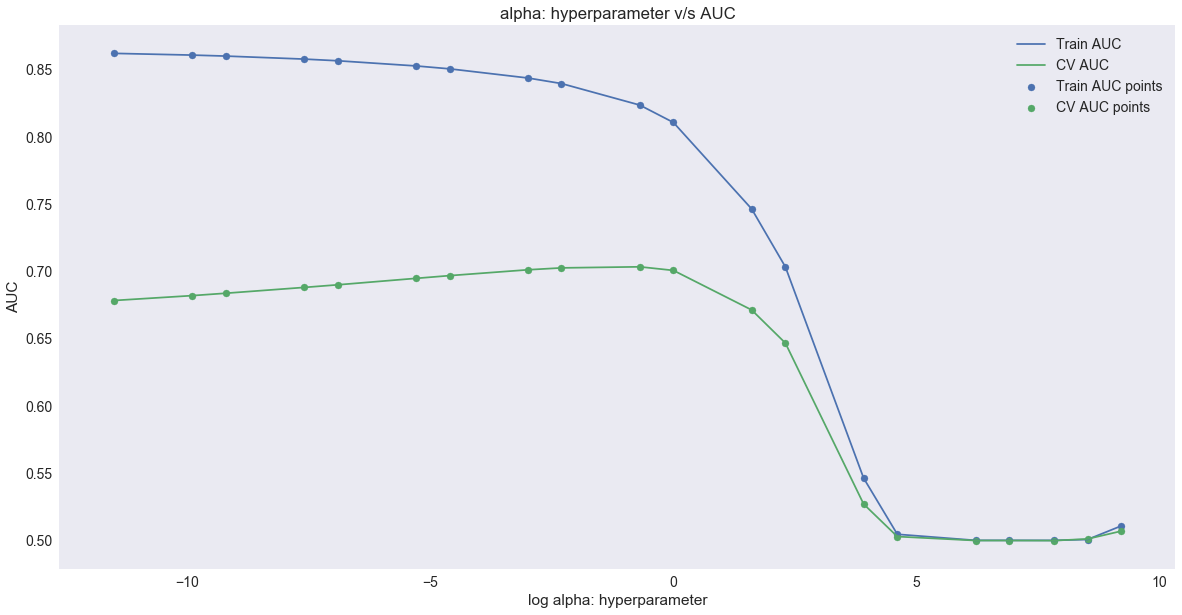

In [317]:

plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

Observation:
    
    both maximum and minimum value of alpha not good for model, for more value of alpha AUC is very low and for low value of alpha Overfitting occure. so alpha will be in between near to 0.5

### Grid search,<font color='red'> SET 1</font>

In [318]:
#https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# prepare a range of alpha values to test
#alphas = np.array([1,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}

n_folds = 10
my_cv = TimeSeriesSplit(n_splits=n_folds).split(x_train_bow)

model = MultinomialNB()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=my_cv, scoring='roc_auc')
grid.fit(x_train_bow, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

#results_grid_bow_NB = pd.DataFrame.from_dict(grid.cv_results_).sort_values(['alpha'])

train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000001B70D13D4C0>,
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)
0.6704443302695043
0.5


optimal alpha value is 0.0001 nearly zero, where F1 score of 0.85(1) on BOW train dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


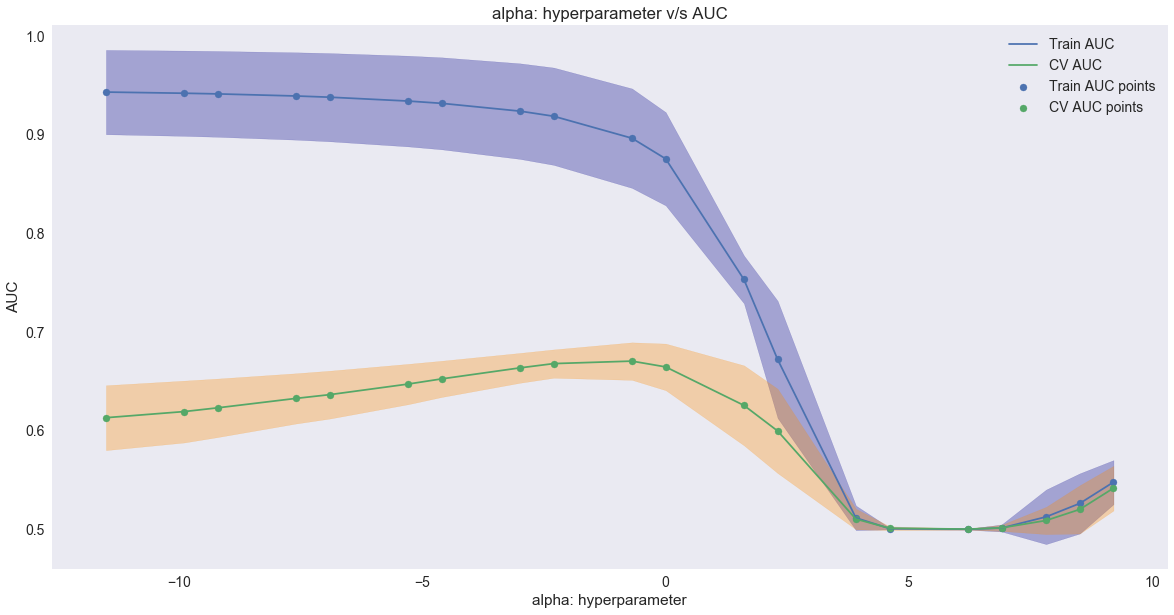

In [319]:

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [320]:
alpha_opt_bow=0.5

### Apply best hyperparameter on test dataset,<font color='red'> SET 1</font>

You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure  
Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.  
Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points  

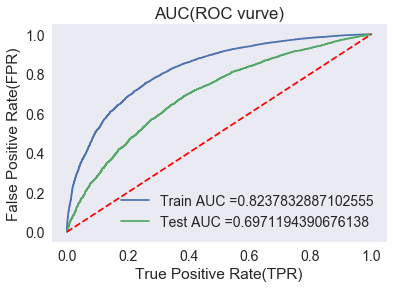

In [321]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = alpha_opt_bow)

nb_bow.fit(x_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, x_train_bow)    
y_test_pred = batch_predict(nb_bow, x_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

BOW_roc_auc_train = auc(test_fpr, test_tpr)
BOW_roc_auc_test = auc(train_fpr, train_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

In [322]:
'''# Plotting the ROC Curve for the Best Classifier
#________________________________________________
#https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/
from sklearn.metrics import roc_curve, auc
Y_score_test = grid.best_estimator_.predict_proba(x_test_bow)
fpr1, tpr1, thresholds1 = roc_curve(y_test,Y_score_test[:, 1])
BOW_roc_auc_test = auc(fpr1, tpr1)

Y_score_train = grid.best_estimator_.predict_proba(x_train_bow)
fpr2, tpr2, thresholds2 = roc_curve(y_train,Y_score_train[:, 1])
BOW_roc_auc_train = auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b',label='AUC_test = %0.2f'% BOW_roc_auc_test)
plt.plot(fpr2, tpr2, 'g',label='AUC_train = %0.2f'% BOW_roc_auc_train)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()'''

"# Plotting the ROC Curve for the Best Classifier\n#________________________________________________\n#https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/\nfrom sklearn.metrics import roc_curve, auc\nY_score_test = grid.best_estimator_.predict_proba(x_test_bow)\nfpr1, tpr1, thresholds1 = roc_curve(y_test,Y_score_test[:, 1])\nBOW_roc_auc_test = auc(fpr1, tpr1)\n\nY_score_train = grid.best_estimator_.predict_proba(x_train_bow)\nfpr2, tpr2, thresholds2 = roc_curve(y_train,Y_score_train[:, 1])\nBOW_roc_auc_train = auc(fpr2, tpr2)\n\nplt.title('Receiver Operating Characteristic')\nplt.plot(fpr1, tpr1, 'b',label='AUC_test = %0.2f'% BOW_roc_auc_test)\nplt.plot(fpr2, tpr2, 'g',label='AUC_train = %0.2f'% BOW_roc_auc_train)\nplt.legend(loc='lower right')\nplt.plot([0,1],[0,1],'r--')\nplt.xlim([-0.1,1.2])\nplt.ylim([-0.1,1.2])\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()"

Here AUC value on BOW test dataset is 0.68. Model is better then BOW because AUC of both train and test are near hence, they are neither underfit or overfit.

In [323]:
'''# Display Performance of the  Hyper-parametrized BOW model on TEST data


y_pred = grid.best_estimator_.predict(x_test_bow)
    
#Evaluate the model accuracy on TEST data

test_accuracy_bow = accuracy_score(y_test, y_pred, normalize=True) * 100
points = accuracy_score(y_test, y_pred, normalize=False)

# Display the classification report
print(classification_report(y_test, y_pred,digits=4))

#Display the model accuracy on TEST data
print('\nThe number of accurate predictions out of {} data points on TEST data is {}'.format(x_test_bow.shape[0], points))
print('Accuracy of the {} model on TEST data is {} %'.format("BOW", '{:f}'.format(np.round(test_accuracy_bow,2))))'''

'# Display Performance of the  Hyper-parametrized BOW model on TEST data\n\n\ny_pred = grid.best_estimator_.predict(x_test_bow)\n    \n#Evaluate the model accuracy on TEST data\n\ntest_accuracy_bow = accuracy_score(y_test, y_pred, normalize=True) * 100\npoints = accuracy_score(y_test, y_pred, normalize=False)\n\n# Display the classification report\nprint(classification_report(y_test, y_pred,digits=4))\n\n#Display the model accuracy on TEST data\nprint(\'\nThe number of accurate predictions out of {} data points on TEST data is {}\'.format(x_test_bow.shape[0], points))\nprint(\'Accuracy of the {} model on TEST data is {} %\'.format("BOW", \'{:f}\'.format(np.round(test_accuracy_bow,2))))'

### confusion matrix(test)

In [324]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



### Train confusing matrix

TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.5589653868227813 for threshold 0.899
[[ 2853   886]
 [ 5713 15048]]
the maximum value of tpr*(1-fpr) 0.5589653868227813 for threshold 0.899


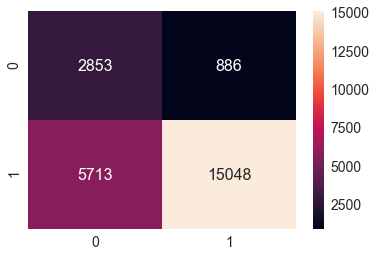

In [328]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### TEST confusing matrix

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4234943487426633 for threshold 0.976
[[1561  718]
 [5022 7699]]
the maximum value of tpr*(1-fpr) 0.4234943487426633 for threshold 0.976


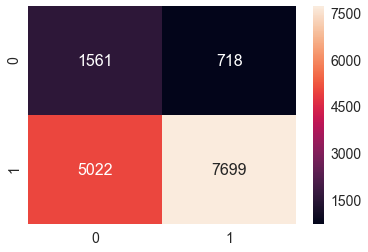

In [325]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

In [329]:

'''#https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
#Note : Putting a - sign indicates the indexes will be sorted in descending order.
pos_class_prob_sorted = (-grid.best_estimator_.feature_log_prob_[1, :]).argsort()
pos_class_top10_features = np.take(z_bow1.get_feature_names(), pos_class_prob_sorted[:10])
print("The top 10 most frequent words from the positive class are :\n")
print(pos_class_top10_features)'''

'#https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697\n#Note : Putting a - sign indicates the indexes will be sorted in descending order.\npos_class_prob_sorted = (-grid.best_estimator_.feature_log_prob_[1, :]).argsort()\npos_class_top10_features = np.take(z_bow1.get_feature_names(), pos_class_prob_sorted[:10])\nprint("The top 10 most frequent words from the positive class are :\n")\nprint(pos_class_top10_features)'

In [330]:
print(x_train_bow.shape, y_train.shape)
print(x_cv_bow.shape)
print(x_test_bow.shape)

(24500, 10528) (24500,)
(10500, 10528)
(15000, 10528)


In [331]:
#probability value of positive class
nb_bow = MultinomialNB(alpha = alpha_opt_bow)
nb_bow.fit(x_train_bow, y_train)

bow_features_probs_neg = {}
for a in range(x_train_bow.shape[1]) :   
    bow_features_probs_neg[a] = nb_bow.feature_log_prob_[0,a]
    
len(bow_features_probs_neg.values())

10528

In [332]:
list(bow_features_probs_neg.values())[-10]

-9.845295877793212

In [333]:
type(bow_features_probs_neg)

dict

In [334]:
#adding categorical variable name
bow_features_names=[]
for a in vectorizer1.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer2.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer3.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer4.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer5.get_feature_names() :
    bow_features_names.append(a)

len(bow_features_names)

100

In [335]:
# adding numerical
bow_features_names.append("price")
'''bow_features_names.append("quantity")
bow_features_names.append("price")
bow_features_names.append("price")
bow_features_names.append("price")'''

'bow_features_names.append("quantity")\nbow_features_names.append("price")\nbow_features_names.append("price")\nbow_features_names.append("price")'

In [336]:
for a in z_bow1.get_feature_names() :
    bow_features_names.append(a)
    
for a in z_bow2.get_feature_names() :
    bow_features_names.append(a)

In [337]:
len(bow_features_names)

10528

In [338]:
final_bow_features = pd.DataFrame({'feature_prob_estimates' : list(bow_features_probs_neg.values()), 'feature_names' : bow_features_names})



In [339]:
#final_bow_features

In [340]:
neg = final_bow_features.sort_values(by = ['feature_prob_estimates'], ascending = True)


In [341]:
neg.nunique()

feature_prob_estimates     528
feature_names             9329
dtype: int64

### 2.4.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [347]:
print('Top 30 negative feature' )
neg.head(30)

Top 30 negative feature


,feature_prob_estimates,feature_names
5197,-13.852629,meanwhile
9777,-13.852629,hearts
4031,-13.852629,highlighter
4020,-13.852629,hesitation
6510,-13.852629,prop
6516,-13.852629,proportion
9761,-13.852629,hand
8836,-13.852629,velocity
857,-13.852629,awful
8216,-13.852629,tangrams


top 10 important feature of negative class vectorised from essay dataset

## 2.4.1.2 Top 10 important features of positive class from SET 1

In [343]:
bow_features_probs_positive = {}

for a in range(x_train_bow.shape[1]):
    bow_features_probs_positive[a] = nb_bow.feature_log_prob_[1,a]

In [344]:
final_bow_features_positive = pd.DataFrame({'feature_prob_estimates' : list(bow_features_probs_positive.values()), 'feature_names' : bow_features_names})



In [345]:
pos = final_bow_features_positive.sort_values(by = ['feature_prob_estimates'], ascending = True)

In [346]:
pos.head(30)

,feature_prob_estimates,feature_names
97,-15.617265,Mr.
99,-15.617265,Mrs.
90,-15.617265,9-12
91,-15.617265,6-8
98,-15.617265,Ms.
92,-15.617265,3-5
93,-15.617265,PreK-2
95,-15.617265,Dr.
9350,-13.671355,blast
9753,-13.420041,ground


## 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

### TFIDF Vectorizing essy and title variable,<font color='red'> SET 2</font>

In [ ]:
# Please write all the code with proper documentation

In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,  ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_tfidf.transform(x_train['preprocessed_essays'].values)
x_cv_tfidf_essays = vectorizer_tfidf.transform(x_cv['preprocessed_essays'].values)
x_test_tfidf_essays = vectorizer_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_cv_tfidf_essays.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)

Shape of matrix after one hot encodig  (24500, 5000) (24500,)
Shape of matrix after one hot encodig  (10500, 5000)
Shape of matrix after one hot encodig  (15000, 5000)


In [349]:
#TFIDF Vectorizer on `project_title`

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_tfidf.transform(x_train['preprocessed_project_title'].values)
x_cv_tfidf_title = vectorizer_tfidf.transform(x_cv['preprocessed_project_title'].values)
x_test_tfidf_title = vectorizer_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)
print("Shape of matrix after one hot encodig ",x_cv_tfidf_title.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)



Shape of matrix after one hot encodig  (24500, 2131)
Shape of matrix after one hot encodig  (10500, 2131)
Shape of matrix after one hot encodig  (15000, 2131)


### merge all sparse data,<font color='red'> SET 2</font>

In [350]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()
x_cv_tfidf = hstack((x_cv_ohe, x_cv_tfidf_essays, x_cv_tfidf_title)).tocsr()
x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title)).tocsr()

print(x_train_tfidf.shape)
print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(24500, 7232)
(10500, 7232)
(15000, 7232)


### simple tuning

In [351]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [352]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i)
    nb.fit(x_train_tfidf, y_train)

    y_train_pred = batch_predict(nb, x_train_tfidf)    
    y_cv_pred = batch_predict(nb, x_cv_tfidf)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


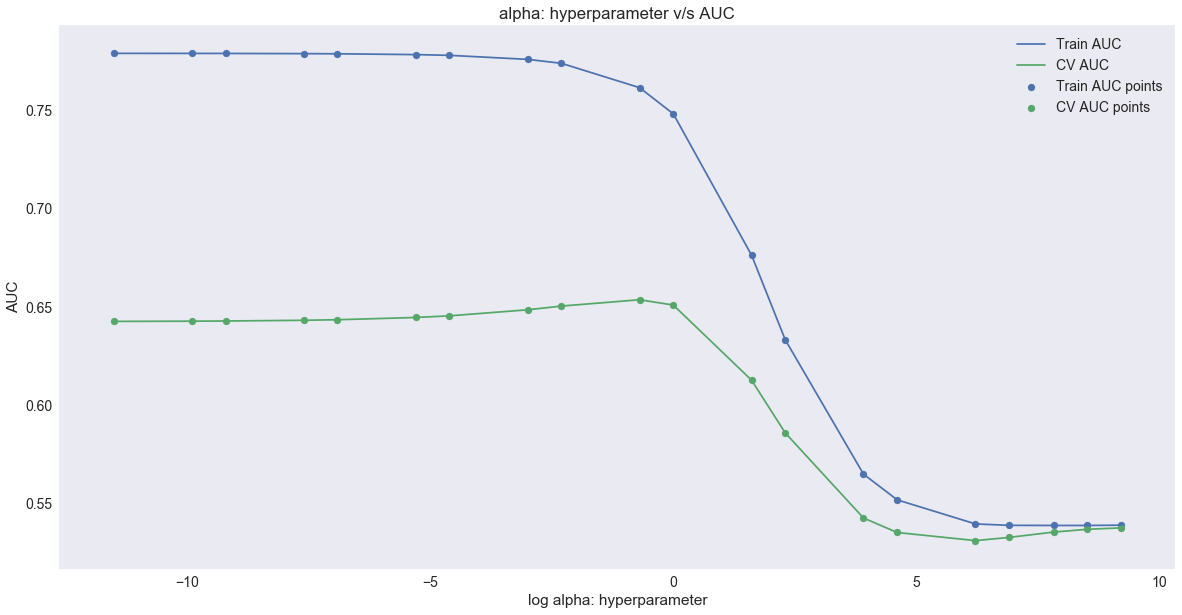

In [353]:

plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

Observation: Same problem as in case of BOW, so here alpha will be 0.5.

### Grid search,<font color='red'> SET 2</font>

In [354]:
#https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# prepare a range of alpha values to test
#alphas = np.array([1,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}

n_folds = 10
my_cv = TimeSeriesSplit(n_splits=n_folds).split(x_train_tfidf)

model = MultinomialNB()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=my_cv, scoring='roc_auc')
grid.fit(x_train_tfidf, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

#results_grid_bow_NB = pd.DataFrame.from_dict(grid.cv_results_).sort_values(['alpha'])

train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
cv_auc = grid.cv_results_['mean_test_score'] 
cv_auc_std= grid.cv_results_['std_test_score']

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000001B7B55D1E08>,
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)
0.6289209594543944
0.5


optimal value of alpha value in TFIDF train dataset is 1 

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20058.84it/s]


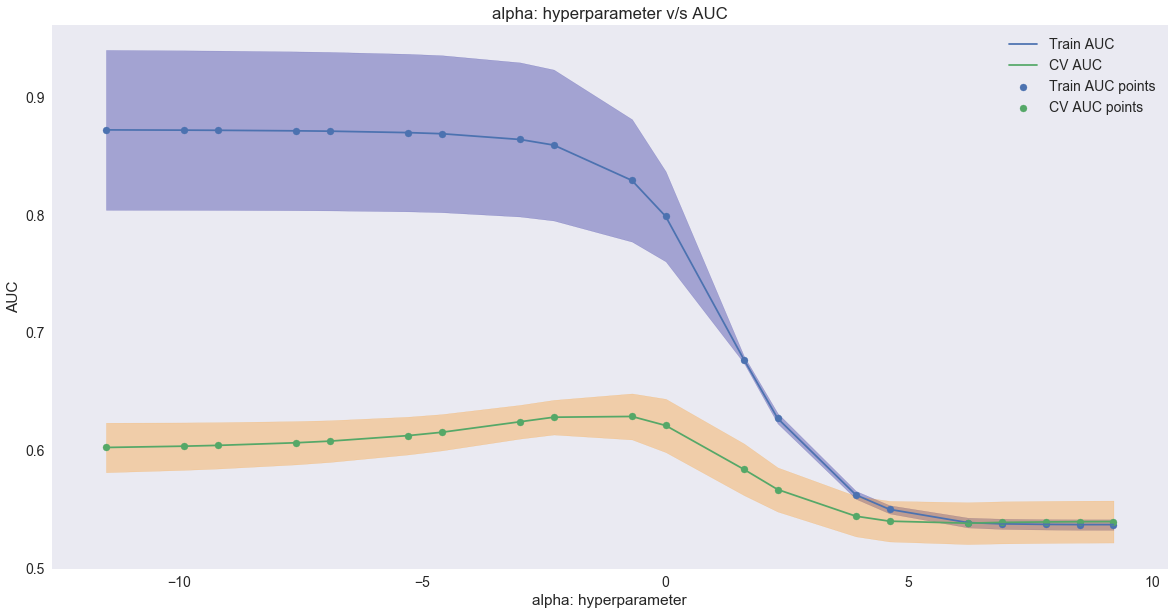

In [355]:

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [396]:
alpha_opt_tfidf=0.5

### Apply best parameter on test data,<font color='red'> SET 2</font>

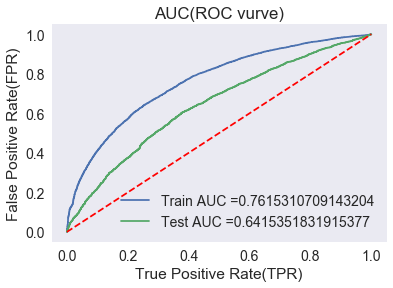

In [397]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

nb_tfidf = MultinomialNB(alpha = alpha_opt_tfidf)

nb_tfidf.fit(x_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_tfidf, x_train_tfidf)    
y_test_pred = batch_predict(nb_tfidf, x_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_roc_auc_train = auc(test_fpr, test_tpr)
tfidf_roc_auc_test = auc(train_fpr, train_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

Here AUC value on TFIDF test dataset is 0.67. Model is better then BOW because AUC of both train and test are near hence, they are neither underfit or overfit.

### Confusing matrix(test)

In [398]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




### Training confusion matrix

TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.47983268461723066 for threshold 0.845
[[ 2540  1199]
 [ 6231 14530]]
the maximum value of tpr*(1-fpr) 0.47983268461723066 for threshold 0.845


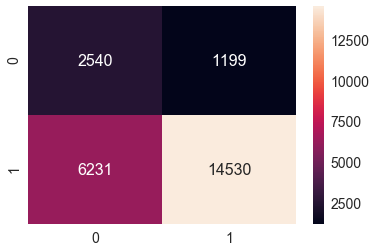

In [399]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test confusion matrix

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37548522982472 for threshold 0.857
[[1263 1016]
 [4442 8279]]
the maximum value of tpr*(1-fpr) 0.37548522982472 for threshold 0.857


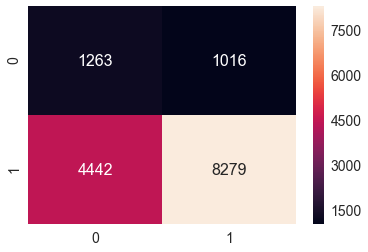

In [400]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

#### 2.4.2.1 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [401]:
print(x_train_tfidf.shape,y_train.shape)
print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(24500, 7232) (24500,)
(10500, 7232)
(15000, 7232)


In [402]:

#https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
#Note : Putting a - sign#probability value of positive class
nb_tfidf = MultinomialNB(alpha = alpha_opt_tfidf)
nb_tfidf.fit(x_train_bow, y_train)

tfidf_features_probs_neg = {}
for a in range(x_train_tfidf.shape[1]) :   
    tfidf_features_probs_neg[a] = nb_tfidf.feature_log_prob_[0,a]

len(tfidf_features_probs_neg)


7232

In [403]:
#adding categorical variable name
tfidf_features_names=[]
for a in vectorizer1.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer2.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer3.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer4.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer5.get_feature_names() :
    tfidf_features_names.append(a)

len(tfidf_features_names)

100

In [404]:
# adding numerical
tfidf_features_names.append("price")

In [405]:
for a in z_tfidf1.get_feature_names() :
    tfidf_features_names.append(a)
    
for a in z_tfidf2.get_feature_names() :
    tfidf_features_names.append(a)

In [406]:
len(tfidf_features_names)

7232

In [407]:
#final tfidf feature
final_tfidf_features = pd.DataFrame({'feature_prob_estimates' : list(tfidf_features_probs_neg.values()), 'feature_names' : tfidf_features_names})

neg = final_tfidf_features.sort_values(by = ['feature_prob_estimates'], ascending = True)

In [408]:
neg.nunique()

feature_prob_estimates     459
feature_names             5970
dtype: int64

In [409]:
print('Top 10 negative feature' )
neg.head(30)

Top 10 negative feature


,feature_prob_estimates,feature_names
2030,-13.852629,healthy
6367,-13.852629,need supplies
7071,-13.852629,want read
6934,-13.852629,text
4511,-13.852629,succeed students
4509,-13.852629,succeed
857,-13.852629,close
1883,-13.852629,gifted
2177,-13.852629,immigrant
3959,-13.852629,shows


#### 2.4.2.2 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [410]:
tfidf_features_probs_positive = {}

for a in range(x_train_tfidf.shape[1]):
    tfidf_features_probs_positive[a] = nb_tfidf.feature_log_prob_[1,a]

In [411]:
final_tfidf_features_positive = pd.DataFrame({'feature_prob_estimates' : list(tfidf_features_probs_positive.values()), 'feature_names' : tfidf_features_names})
pos = final_tfidf_features_positive.sort_values(by = ['feature_prob_estimates'], ascending = True)


In [412]:
pos.head(30)

,feature_prob_estimates,feature_names
97,-15.617265,Mr.
93,-15.617265,PreK-2
92,-15.617265,3-5
98,-15.617265,Ms.
91,-15.617265,6-8
90,-15.617265,9-12
95,-15.617265,Dr.
99,-15.617265,Mrs.
2156,-13.219370,hundred
6895,-13.219370,take seat


## Conclusion<font color='red'> </font>




In [413]:
# Please compare all your models using Prettytable library

In [414]:
#!pip install prettytable

In [415]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper parameter_alpha", "AUC_test","AUC_Train"]
x.add_row(["BOW", "MultinomialNB", alpha_opt_bow, BOW_roc_auc_test,BOW_roc_auc_train])
x.add_row(["TFIDF", "MultinomialNB", alpha_opt_tfidf, tfidf_roc_auc_test,tfidf_roc_auc_train])
print(x)

with open('Result_DonorsChoose_NB.txt', 'w') as w:
    w.write(str(x))


+------------+---------------+-----------------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyper parameter_alpha |      AUC_test      |     AUC_Train      |
+------------+---------------+-----------------------+--------------------+--------------------+
|    BOW     | MultinomialNB |          0.5          | 0.8237832887102555 | 0.6971194390676138 |
|   TFIDF    | MultinomialNB |          0.5          | 0.7615310709143204 | 0.6415351831915377 |
+------------+---------------+-----------------------+--------------------+--------------------+


Observation:

Data set use is only 50000 rows because Memory problem of my PC(4 gb RAM)

At alpha=0.5, both case is neither overfit nor underfit

Test accuracy in both case is nearly same.

Both case have high AUC value in test and low value in train. it show that model perform well on test dataset.

